In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import glob
from copy import deepcopy
import geopandas
import shapely
import matplotlib.colors as colors

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xarray/backends/cfgrib_.py:29: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [3]:
#loading raw ukbms data
site_indices = pd.read_csv('ukbms2020csv/ukbmssiteindices2020.csv',encoding='cp1252')

In [4]:
#loading combined site indices and climate data, combined using 'nearest' method of selection see HADUK_Intermediate.py
indices_climate = pd.read_csv('site_climate.csv')

#dropping the first column -> previous index
indices_climate.drop(columns=indices_climate.columns[0], axis=1, inplace=True)
# indices_climate.head

In [5]:
#raw climatic variables
airtemp_filenames = glob.glob('/Users/Louisa/Desktop/MScProject/HADUKAnnual (1973-2020)/annual mean air temp/*.nc')
rainfall_filenames = glob.glob('/Users/Louisa/Desktop/MScProject/HADUKAnnual (1973-2020)/annual rainfall/*.nc')
humidity_filenames = glob.glob('/Users/Louisa/Desktop/MScProject/HADUKAnnual (1973-2020)/relative humidity/*.nc')
sunshine_filenames = glob.glob('/Users/Louisa/Desktop/MScProject/HADUKAnnual (1973-2020)/sunshine hours/*.nc')
airtemp_dat = xr.open_mfdataset(airtemp_filenames)
rainfall_dat = xr.open_mfdataset(rainfall_filenames)
humidity_dat = xr.open_mfdataset(humidity_filenames)
sunshine_dat = xr.open_mfdataset(sunshine_filenames)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xarray/backends/plugins.py:64: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


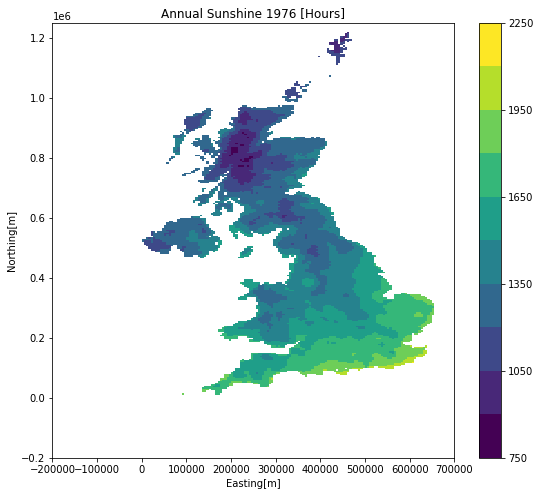

In [6]:
#sun 1976
plt.figure(figsize=[9,8])
sunplt1976 = sunshine_dat['sun'].sel(time='1976')
sunplt1976.plot(add_labels=False, levels= 10) #removing xarray labels
plt.title('Annual Sunshine 1976 [Hours]')
plt.xlabel('Easting[m]')
plt.ylabel('Northing[m]')
plt.savefig('figures/Sunshine 1976.png')

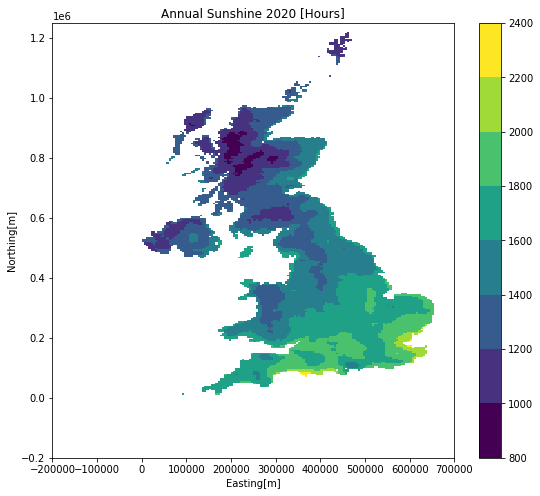

In [7]:
#sun 2020 
plt.figure(figsize=[9,8])
sunplt2020 = sunshine_dat['sun'].sel(time='2020')
sunplt2020.plot(add_labels=False, levels = 10)
plt.title('Annual Sunshine 2020 [Hours]')
plt.xlabel('Easting[m]')
plt.ylabel('Northing[m]')
plt.savefig('figures/Sunshine 2020.png')

In [44]:
print(sunplt1976.to_masked_array().mean())
print(sunplt2020.to_masked_array().mean())

1427.7008828983269
1496.6031684085676


HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 1:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 476 in H5O__attr_open_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #006: H5Adense.c line 394 in H5A__dense_open(): can't locate attribute in name index
    major: Attribute
    minor: Object not 

HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 1:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 476 in H5O__attr_open_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #006: H5Adense.c line 394 in H5A__dense_open(): can't locate attribute in name index
    major: Attribute
    minor: Object not 

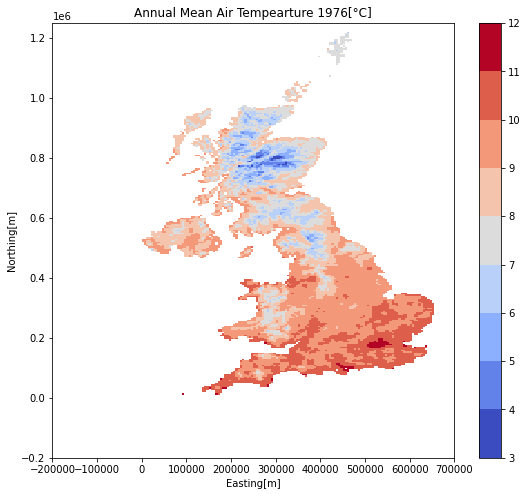

In [8]:
#mean airtemp 1976
plt.figure(figsize=[9,8])
airplt1976 = airtemp_dat['tas'].sel(time='1976')
# color1= '#89CFF0'
# color2 = '#FF6E00'
airplt1976.plot(add_labels=False, levels = 10, cmap='coolwarm') #removing xarray labels, changing colours
plt.title('Annual Mean Air Tempearture 1976[°C]')
plt.xlabel('Easting[m]')
plt.ylabel('Northing[m]')
plt.savefig('figures/Air 1976.png')

HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 1:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 476 in H5O__attr_open_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #006: H5Adense.c line 394 in H5A__dense_open(): can't locate attribute in name index
    major: Attribute
    minor: Object not 

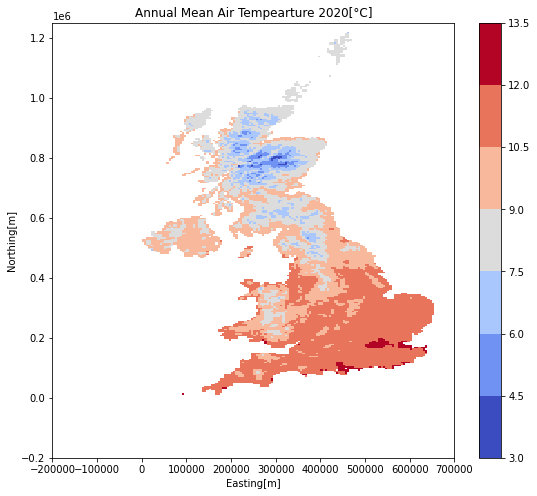

In [45]:
#mean airtemp 2020
plt.figure(figsize=[9,8])
airplt2020 = airtemp_dat['tas'].sel(time='2020')
airplt2020.plot(add_labels=False, levels = 10, cmap='coolwarm') #removing xarray labels, changing colours for purpose
plt.title('Annual Mean Air Tempearture 2020[°C]')
plt.xlabel('Easting[m]')
plt.ylabel('Northing[m]')
plt.savefig('figures/Air 2020.png')

HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 2:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 476 in H5O__attr_open_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #006: H5Adense.c line 394 in H5A__dense_open(): can't locate attribute in name index
    major: Attribute
    minor: Object not 

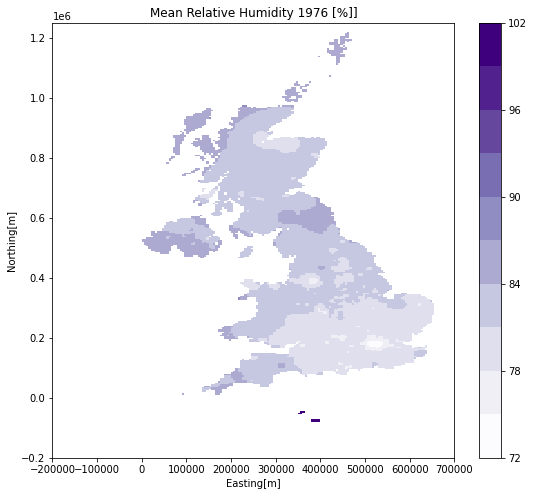

In [48]:
#annual relative humidity 1976
plt.figure(figsize=[9,8])
humidplt1976 = humidity_dat['hurs'].sel(time='1976')
# color1= '#89CFF0'
# color2 = '#FF6E00'
humidplt1976.plot(add_labels=False, levels = 10, cmap='Purples') #removing xarray labels, changing colours
plt.title('Mean Relative Humidity 1976 [%]]')
plt.xlabel('Easting[m]')
plt.ylabel('Northing[m]')
plt.savefig('figures/Humidity 1976.png')

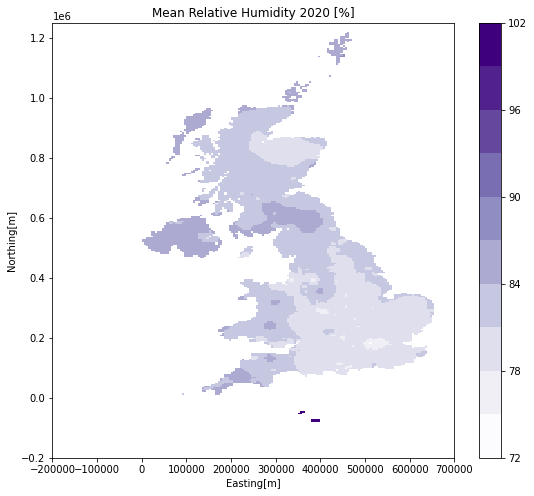

In [49]:
plt.figure(figsize=[9,8])
humidplt2020 = humidity_dat['hurs'].sel(time='2020')
humidplt2020.plot(add_labels=False, levels = 10, cmap='Purples') #removing xarray labels, changing colours
plt.title('Mean Relative Humidity 2020 [%]')
plt.xlabel('Easting[m]')
plt.ylabel('Northing[m]')
plt.savefig('figures/Humidity 2020.png')

In [47]:
print(humidplt1976.to_masked_array().mean())
print(humidplt2020.to_masked_array().mean())

81.96404646417585
81.91124372868984


HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 2:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 476 in H5O__attr_open_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #006: H5Adense.c line 394 in H5A__dense_open(): can't locate attribute in name index
    major: Attribute
    minor: Object not 

HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 1:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 476 in H5O__attr_open_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #006: H5Adense.c line 394 in H5A__dense_open(): can't locate attribute in name index
    major: Attribute
    minor: Object not 

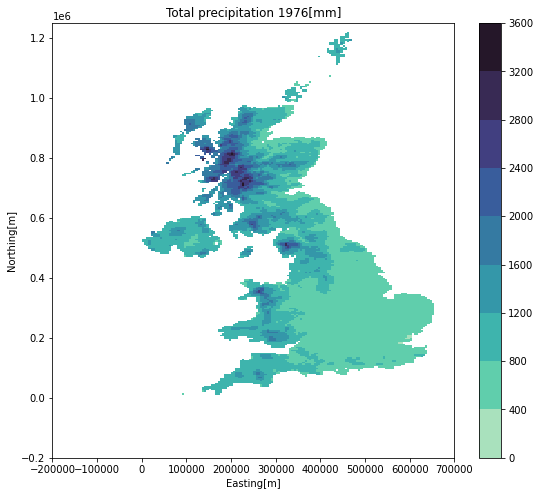

In [12]:
plt.figure(figsize=[9,8])
rainplt1976 = rainfall_dat['rainfall'].sel(time='1976')
# color1= '#89CFF0'
# color2 = '#FF6E00'
rainplt1976.plot(add_labels=False, levels = 10, cmap='mako_r') #removing xarray labels, changing colours
plt.title('Total precipitation 1976[mm]')
plt.xlabel('Easting[m]')
plt.ylabel('Northing[m]')
plt.savefig('figures/Rainfall 1976.png')

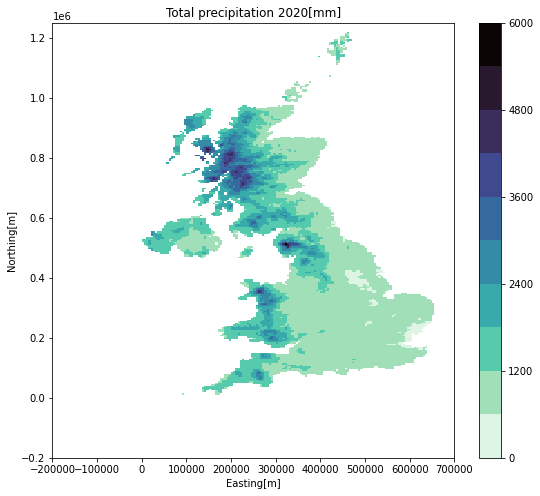

In [13]:
plt.figure(figsize=[9,8])
rainplt2020 = rainfall_dat['rainfall'].sel(time='2020')
# color1= '#89CFF0'
# color2 = '#FF6E00'
rainplt2020.plot(add_labels=False, levels = 10, cmap='mako_r') #removing xarray labels, changing colours
plt.title('Total precipitation 2020[mm]')
plt.xlabel('Easting[m]')
plt.ylabel('Northing[m]')
plt.savefig('figures/Rainfall 2020.png')

In [43]:
print(rainplt1976.to_masked_array().mean())
print(rainplt2020.to_masked_array().mean())

980.0606885748759
1340.510817572505


In [14]:
#creating dataframe consisting of climatic variables, total site index, species richness for each site each year
df1 = indices_climate.groupby(by = ['Site Number', 'YEAR'])['SPECIES CODE'].count().reset_index()
df2 = indices_climate.groupby(by = ['Site Number', 'YEAR'])['SITE INDEX'].sum().reset_index()

df2 = df1.merge(df2)
df2.rename(columns={'SPECIES CODE':'SPECIES RICHNESS', 'SITE INDEX':'TOTAL SITE INDEX'}, inplace=True)

# print(df2.shape)
# print(df2)
df1 = indices_climate.merge(df2)
# print(df1)

In [15]:
def calculate_simpson_diversity(df,sitenum,year):
    '''Calculates simpson's diversity index for a site in a specified year'''
    df1 = df[(df['YEAR'] == year) & (df['Site Number'] == sitenum)].copy()
    df1.reset_index(inplace=True)
    nlist = []
    for i in df1.index:
        x = df1['SITE INDEX'][i]
        nlist.append((x-1)*x)
    total = df1['TOTAL SITE INDEX'][0]
    totalb = total*(total-1)
    totala = sum(nlist)
    D = 1 - (totala/totalb)
    return D


In [16]:
# df3 = deepcopy(df1)
# df3['Simpsons Index']= df3.apply(lambda row: calculate_simpson_diversity(df3, row['Site Number'], row['YEAR']), axis = 1)
#df3.tocsv(siteindices_biodiver)

In [17]:
# Merging dataframe with simpsons indices to per site per year data, savign as csv for future use

# bio_clim =pd.merge(df2, df3, how='left', left_on=['Site Number','YEAR'], right_on=['Site Number','YEAR'])
# bio_clim.drop_duplicates(keep='first',inplace=True) #dropping duplicate rows
# bio_clim.reset_index(inplace=True) #resetting index
# bio_clim.drop(columns=bio_clim.columns[0], axis=1, inplace=True) #dropping extra index column
# # bio_clim.to_csv('bioD_clim_site_year')
bio_clim = pd.read_csv('bioD_clim_site_year') #loading csv created above


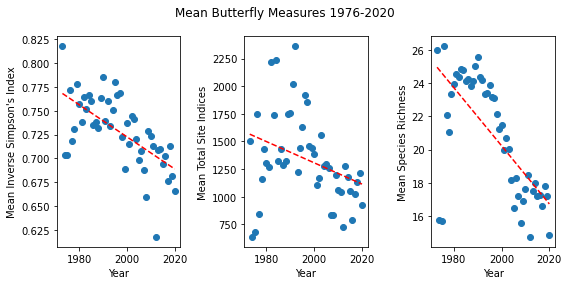

In [18]:
avgs = bio_clim.groupby('YEAR').mean().reset_index()
avgs.drop(['Easting','Northing','sun','average temp','rainfall','relative humidity'], inplace=True, axis=1)

fig,axes =plt.subplots(ncols=3,figsize=(8,4))
axes[0].scatter(avgs['YEAR'],avgs['Simpsons Index'])
axes[1].scatter(avgs['YEAR'],avgs['TOTAL SITE INDEX'])
axes[2].scatter(avgs['YEAR'],avgs['SPECIES RICHNESS'])

z1 = np.polyfit(avgs['YEAR'],avgs['Simpsons Index'],1)
p1 = np.poly1d(z1)
axes[0].plot(avgs['YEAR'],p1(avgs['YEAR']),'r--')

z2 = np.polyfit(avgs['YEAR'],avgs['TOTAL SITE INDEX'],1)
p2 = np.poly1d(z2)
axes[1].plot(avgs['YEAR'],p2(avgs['YEAR']),'r--')

z3 = np.polyfit(avgs['YEAR'],avgs['SPECIES RICHNESS'],1)
p3 = np.poly1d(z3)
axes[2].plot(avgs['YEAR'],p3(avgs['YEAR']),'r--')

axes[0].set(ylabel="Mean Inverse Simpson's Index",xlabel='Year')
axes[1].set(ylabel='Mean Total Site Indices',xlabel='Year')
axes[2].set(ylabel='Mean Species Richness',xlabel='Year')
fig.suptitle('Mean Butterfly Measures 1976-2020')
fig.tight_layout()
fig.savefig('figures/Mean Measures.png')

In [19]:
bio_clim.dropna(inplace=True)
bio_clim.drop(bio_clim.columns[0],axis =1, inplace=True)
bio_clim['Diversity'] = np.select([bio_clim['Simpsons Index'] >= 0.66, bio_clim['Simpsons Index'] <= 0.33],['High','Low'],default='Medium') #categorising sites in each year into 'low/medium/high' diversity 

In [20]:
site_location = pd.read_csv('final_ukbmssitelocationdata2020.csv',encoding='cp1252')
bio_clim_latlong =pd.merge(bio_clim, site_location[['Site Number','latitude','longitude']], how='left', left_on=['Site Number'], right_on=['Site Number']) #adding site location latitude and longitude to final dataset
# bio_clim_latlong.to_csv('BioD_year_site_latlong.csv')
bio_clim_latlong

Site Number  YEAR  SPECIES RICHNESS  TOTAL SITE INDEX  COUNTRY  \
0                1  1976                27               798  England   
1                1  1977                28               413  England   
2                1  1978                27               857  England   
3                1  1979                27               825  England   
4                1  1980                27               911  England   
...            ...   ...               ...               ...      ...   
24553         5706  2020                15               796  England   
24554         5707  2020                14              3070  England   
24555         5708  2020                13              1507  England   
24556         5709  2020                18              1343  England   
24557         9002  2002                 3                51  England   

        Easting  Northing          sun  average temp     rainfall  \
0      521000.0  281000.0  1501.819509      9.953381   488.571987   
1      521000.0  281000.0  1343.662376      9.526488   494.270350   
2      521000.0  281000.0  1288.404486      9.407102   523.350323   
3      521000.0  281000.0  1377.842541      9.009214   560.583337   
4      521000.0  281000.0  1377.842541      9.009214   636.268119   
...         ...       ...          ...           ...          ...   
24553  420800.0  376000.0  1486.724707      9.134446  1264.091079   
24554  406700.0  371200.0  1382.917646      8.727352  1713.559597   
24555  427200.0  315700.0  1557.146589     10.361915   934.172339   
24556  427800.0  316800.0  1557.146589     10.361915   934.172339   
24557  248400.0   70300.0  1419.537168     10.780422  1205.736074   

       relative humidity  Simpsons Index Diversity   latitude  longitude  
0              81.285496        0.779181      High  52.413625  -0.222413  
1              83.330676        0.738111      High  52.413625  -0.222413  
2              84.013799        0.801127      High  52.413625  -0.222413  
3              83.049021        0.827729      High  52.413625  -0.222413  
4              83.049021        0.827968      High  52.413625  -0.222413  
...                  ...             ...       ...        ...        ...  
24553          83.358684        0.848219      High  53.280572  -1.689506  
24554          83.611149        0.794148      High  53.237789  -1.901073  
24555          81.763461        0.854101      High  52.738252  -1.598579  
24556          81.763461        0.887389      High  52.748110  -1.589600  
24557          85.625346        0.580392    Medium  50.512809  -4.139556  

[24558 rows x 15 columns]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax 

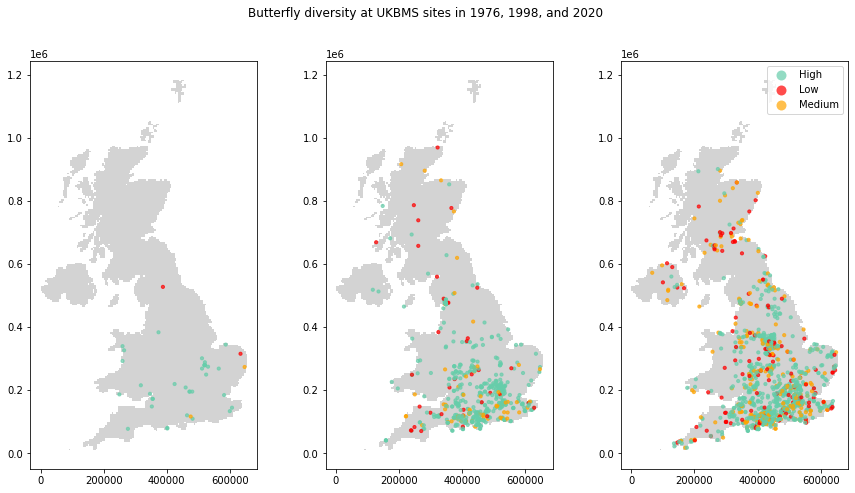

In [21]:
#1997 ukbms, diversity high low etc on map
ukbms1976 = bio_clim_latlong[(bio_clim_latlong['YEAR'] == 1976)]
ukbms1998 = bio_clim_latlong[(bio_clim_latlong['YEAR'] == 1998)]

ukbms2020 = bio_clim_latlong[(bio_clim_latlong['YEAR'] == 2020)]

colors_dict = {'High':'green','Medium':'orange','Low':'red'}

ukmap = geopandas.read_file('uk_shpfiles/ukcp18-uk-land-5km.shp')
geometry = [shapely.geometry.Point(xy) for xy in zip(ukbms1976['Easting'], ukbms1976['Northing'])]
geometry1998 = [shapely.geometry.Point(xy) for xy in zip(ukbms1998['Easting'], ukbms1998['Northing'])]
geometry2020 = [shapely.geometry.Point(xy) for xy in zip(ukbms2020['Easting'], ukbms2020['Northing'])]
crs = {'init':'epsg:27700'}
gdf1976 = geopandas.GeoDataFrame(ukbms1976,crs=crs,geometry=geometry)
gdf1998 = geopandas.GeoDataFrame(ukbms1998,crs=crs,geometry=geometry1998)
gdf2020 = geopandas.GeoDataFrame(ukbms2020,crs=crs,geometry=geometry2020)

fig, (ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3,figsize=(15,7.5))
ukmap.plot(ax=ax1,color='lightgrey')
ukmap.plot(ax=ax2,color='lightgrey')
ukmap.plot(ax=ax3,color='lightgrey')
ax1 = gdf1976.plot(ax=ax1,column='Diversity',legend=False, cmap=colors.ListedColormap(['mediumaquamarine','Red','Orange']),alpha=0.7,markersize=10)

ax1 = gdf1998.plot(ax=ax2,column='Diversity',legend=False, cmap=colors.ListedColormap(['mediumaquamarine','Red','Orange']),alpha=0.7,markersize=10)

ax3 = gdf2020.plot(ax=ax3,column='Diversity',legend=True, cmap=colors.ListedColormap(['mediumaquamarine','Red','Orange']),alpha=0.7,markersize=10)

plt.suptitle('Butterfly diversity at UKBMS sites in 1976, 1998, and 2020')
plt.savefig('figures/butterflyDiv.png')


In [33]:
low_1976 = ukbms1976[(ukbms1976['Diversity'] == 'Low')].count()
low_1998 = ukbms1998[(ukbms1998['Diversity'] == 'Low')].count()
low_2020 = ukbms2020[(ukbms2020['Diversity'] == 'Low')].count()

print('low % 1976:',(low_1976['Diversity']/len(ukbms1976['Diversity'])*100))
print('low % 1998:',(low_1998['Diversity']/len(ukbms1998['Diversity'])*100))
print('low % 2020:',(low_2020['Diversity']/len(ukbms2020['Diversity'])*100))


medium_1976 = ukbms1976[(ukbms1976['Diversity'] == 'Medium')].count()
medium_1998 = ukbms1998[(ukbms1998['Diversity'] == 'Medium')].count()
medium_2020 = ukbms2020[(ukbms2020['Diversity'] == 'Medium')].count()

print('medium % 1976:',(medium_1976['Diversity']/len(ukbms1976['Diversity'])*100))
print('medium % 1998:',(medium_1998['Diversity']/len(ukbms1998['Diversity'])*100))
print('medium % 2020:',(medium_2020['Diversity']/len(ukbms2020['Diversity'])*100))

low % 1976: 5.263157894736842
low % 1998: 7.326732673267326
low % 2020: 11.409395973154362
medium % 1976: 5.263157894736842
medium % 1998: 14.653465346534652
medium % 2020: 20.385906040268456
